In [54]:
import pandas as pd

data = pd.read_csv('../datasets/airline_passenger_satisfaction.csv')
# using data.copy() to create a new DataFrame, keeping the original data intact
df = pd.DataFrame(data)
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction Score
0,1,Male,48,First-time,Business,Business,821.0,2.0,5.0,3,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5,5,3.30
1,2,Female,35,Returning,Business,Business,821.0,26.0,39.0,2,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5,5,8.75
2,3,Male,41,Returning,Business,Business,853.0,0.0,0.0,4,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3,3,6.95
3,4,Male,50,Returning,Business,Business,1905.0,0.0,0.0,2,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5,5,6.12
4,5,Female,49,Returning,Business,Business,3470.0,0.0,1.0,3,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3,3,6.17


In [55]:
print(" \nCount total NaN at each column in our dataset : \n\n", df.isnull().sum())

 
Count total NaN at each column in our dataset : 

 ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             1
Departure Delay                            37
Arrival Delay                             487
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                            24
Gate Location                              24
On-board Service                           24
Seat Comfort                               24
Leg Room Service                           41
Cleanliness                                29
Food and Drink                             29
In-flight Service                          12
In-flight Wifi Service     

In [56]:
# Handle missing values using median for numerical columns
service_columns = ['Online Boarding', 'Gate Location', 'On-board Service', 
                  'Seat Comfort', 'Leg Room Service', 'Cleanliness', 
                  'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'Flight Distance', 'Departure Delay', 'Arrival Delay']
for col in service_columns:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

# because the satisfaction score kinda depends on the customer type, we can use the median of the satisfaction score by customer type to fill the missing values
# Handle satisfaction score using median by customer type
df['Satisfaction Score'] = df.groupby('Customer Type')['Satisfaction Score'].transform(
    lambda x: x.fillna(x.median()))

In [57]:
print("\nData shape after preprocessing:", df.shape)
print("\nMissing values after preprocessing:")
print(df.isnull().sum())


Data shape after preprocessing: (129880, 24)

Missing values after preprocessing:
ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service               

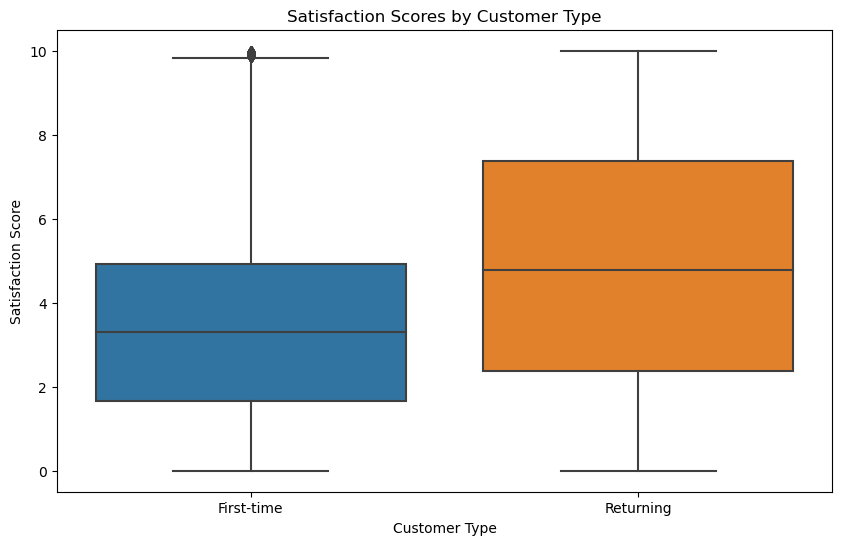

In [58]:
# 2. Plot satisfaction by customer type

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Type', y='Satisfaction Score', data=df)
plt.title('Satisfaction Scores by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Satisfaction Score')
plt.savefig('satisfaction_by_customer.png')
plt.show()

In [59]:
print("\nSatisfaction Score Statistics by Customer Type:")
print(df.groupby('Customer Type')['Satisfaction Score'].describe())


Satisfaction Score Statistics by Customer Type:
                  count      mean       std  min   25%   50%   75%   max
Customer Type                                                           
First-time      23780.0  3.704070  2.573696  0.0  1.66  3.30  4.93  10.0
Returning      106100.0  4.888534  2.888475  0.0  2.38  4.79  7.38  10.0


<Figure size 1000x600 with 0 Axes>

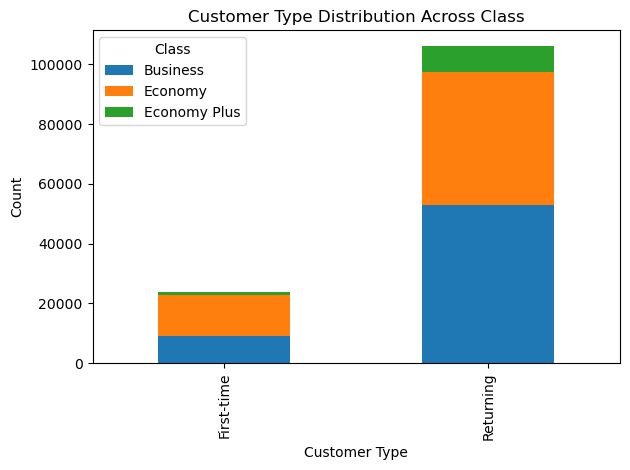

In [60]:
# 3. Plot customer distribution by class
plt.figure(figsize=(10, 6))
customer_class = pd.crosstab(df['Customer Type'], df['Class'])
customer_class.plot(kind='bar', stacked=True)
plt.title('Customer Type Distribution Across Class')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Class')
plt.tight_layout()
plt.savefig('customer_class_distribution.png')

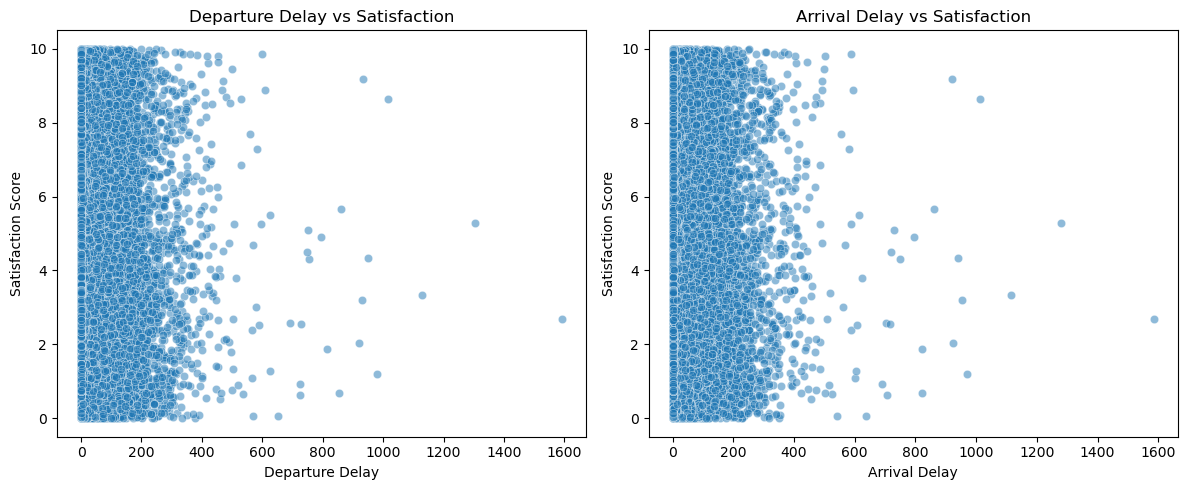

In [61]:
# 4. Plot delays vs satisfaction

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Departure Delay', y='Satisfaction Score', alpha=0.5)
plt.title('Departure Delay vs Satisfaction')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Arrival Delay', y='Satisfaction Score', alpha=0.5)
plt.title('Arrival Delay vs Satisfaction')

plt.tight_layout()
plt.savefig('delays_satisfaction.png')

In [62]:
# reduce these features to 3 main features
experience_features = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking',
    'Check-in Service', 'Online Boarding', 'Gate Location',
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink', 'In-flight Service',
    'In-flight Wifi Service', 'In-flight Entertainment',
    'Baggage Handling'
]

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[experience_features])

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

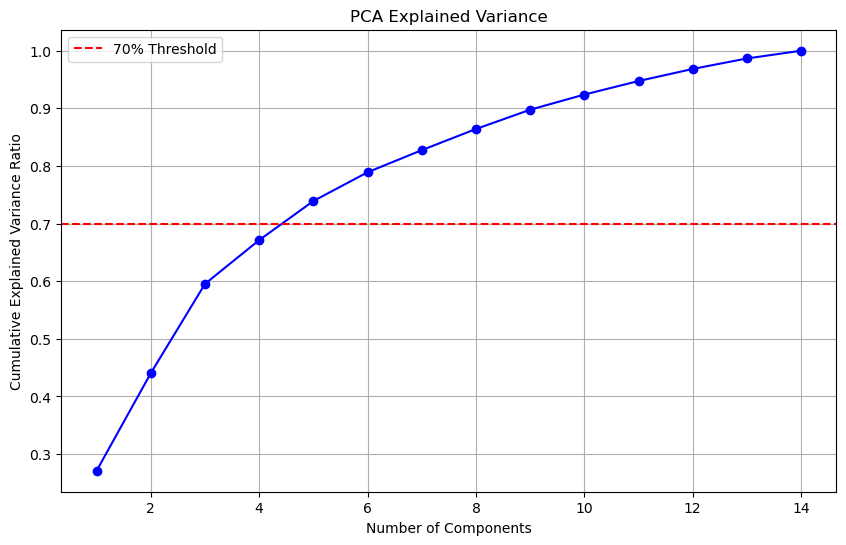

In [64]:
# Plot explained variance
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
plt.axhline(y=0.7, color='r', linestyle='--', label='70% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.legend()
plt.savefig('pca_variance.png')
plt.show()

In [52]:
print("\nExplained variance ratio for first 3 components:")
for i, ratio in enumerate(pca.explained_variance_ratio_[:3], 1):
    print(f"PC{i}: {ratio:.4f}")

# Print component loadings
print("\nComponent loadings for first 3 PCs:")
loadings = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=experience_features
)
print(loadings)


Explained variance ratio for first 3 components:
PC1: 0.2712
PC2: 0.1694
PC3: 0.1549

Component loadings for first 3 PCs:
                                             PC1       PC2       PC3
Departure and Arrival Time Convenience -0.100555 -0.418178 -0.016973
Ease of Online Booking                 -0.163626 -0.534750  0.058649
Check-in Service                       -0.181844  0.047417 -0.135792
Online Boarding                        -0.281070 -0.150877  0.165692
Gate Location                          -0.065764 -0.429886  0.047032
On-board Service                       -0.277610  0.064621 -0.383339
Seat Comfort                           -0.345179  0.158822  0.314078
Leg Room Service                       -0.222965  0.010030 -0.299652
Cleanliness                            -0.356504  0.182655  0.317804
Food and Drink                         -0.307301  0.164818  0.348105
In-flight Service                      -0.266317  0.058317 -0.441820
In-flight Wifi Service                 -0.235569 

In [65]:
# 5. Linear Regression with 3 components
from sklearn.linear_model import LinearRegression

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

# Fit regression
model = LinearRegression()
model.fit(X_pca_3, df['Satisfaction Score'])

LinearRegression()

In [66]:
print("\nLinear Regression Results:")
print(f"R-squared score: {model.score(X_pca_3, df['Satisfaction Score']):.4f}")
print("\nComponent coefficients:")
for i, coef in enumerate(model.coef_, 1):
    print(f"PC{i}: {coef:.4f}")


Linear Regression Results:
R-squared score: 0.2077

Component coefficients:
PC1: -0.6698
PC2: 0.0097
PC3: -0.0572


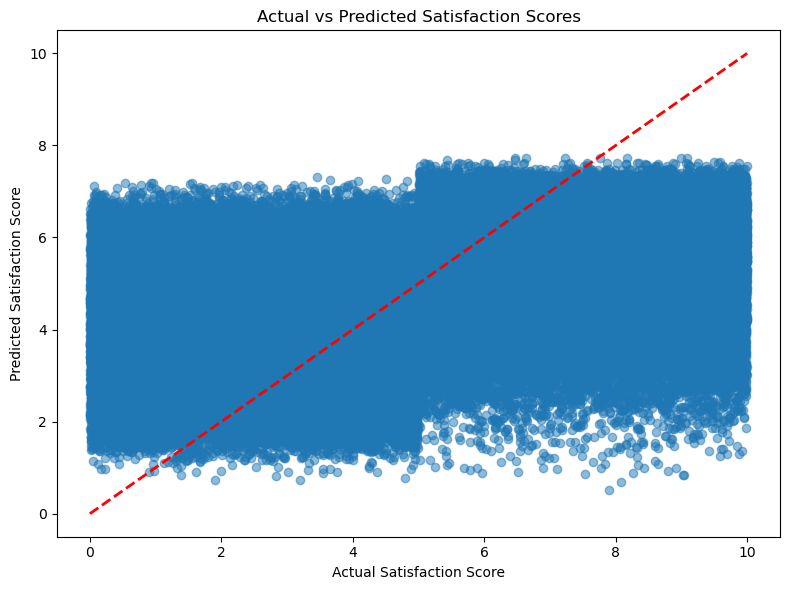

In [68]:
y_pred = model.predict(X_pca_3)
plt.figure(figsize=(8, 6))
plt.scatter(df['Satisfaction Score'], y_pred, alpha=0.5)
plt.plot([df['Satisfaction Score'].min(), df['Satisfaction Score'].max()], 
         [df['Satisfaction Score'].min(), df['Satisfaction Score'].max()], 
         'r--', lw=2)
plt.xlabel('Actual Satisfaction Score')
plt.ylabel('Predicted Satisfaction Score')
plt.title('Actual vs Predicted Satisfaction Scores')
plt.tight_layout()
plt.savefig('regression_results.png')
plt.show()